In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
pd.set_option("display.max_columns", None)
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

In [4]:
listings.describe

   host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...                 NaN   
1      Laid-back Native New Yorker (formerly bi-coast...        within a day   
2       I am an artist(painter, filmmaker) and curato...        within a day   
3      Rebecca is an artist/designer, and Henoch is i...        within a day   
4      I used to work for a financial industry but no...      within an hour   
...                                                  ...                 ...   
36719  Animal lover, designer, traveler. \nGood vibes...      within an hour   
36720  I love my bike, the NYT and good coffee/red wi...                 NaN   
36721  Vibe is a full-service provider of furnished h...  within a few hours   
36722                                                NaN                 NaN   
36723                                                NaN      within an hour   

      host_response_rate host_acceptance_rate host_is_superhost  \
0              

In [5]:
listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [6]:
listings_reduced = listings[['id', 'host_id', 
       'host_name', 'host_since', 
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

listings_reduced.head()

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,2845,Jennifer,2008-09-09,NaN,NaN,NaN,f,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,6,36,66,341,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,4869,LisaRoxanne,2008-12-07,within a day,50%,88%,f,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,1,7,212,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,7356,Garon,2009-02-03,within a day,100%,NaN,f,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,t,30,60,90,365,50,0,0,2014-01-22,2016-06-05,4.52,4.22,4.09,4.91,4.91,4.47,4.52,NaN,f,1,0,1,0,0.55
3,5136,7378,Rebecca,2009-02-03,within a day,88%,33%,f,Greenwood Heights,1.0,1.0,"['email', 'phone', 'reviews']",t,t,NaN,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""TV with standard cable"", ""Long term stays al...",$275.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,7,9,9,184,1,0,0,2014-01-02,2014-01-02,5.00,5.00,5.00,5.00,5.00,4.00,5.00,NaN,f,1,1,0,0,0.01
4,5178,8967,Shunichi,2009-03-03,within an hour,100%,100%,f,Hell's Kitchen,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"New York, United States",Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""Free street parking"", ""TV"", ""W...",$61.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,3,7,14,255,485,12,4,2010-08-18,2021-07-18,4.20,4.19,3.71,4.65,4.40,4.86,4.35,NaN,f,1,0,1,0,3.63


In [7]:
listings_reduced.columns


Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'revi

In [8]:
listings_reduced.shape
#60 columns, 36724 records

(36724, 60)

<AxesSubplot:>

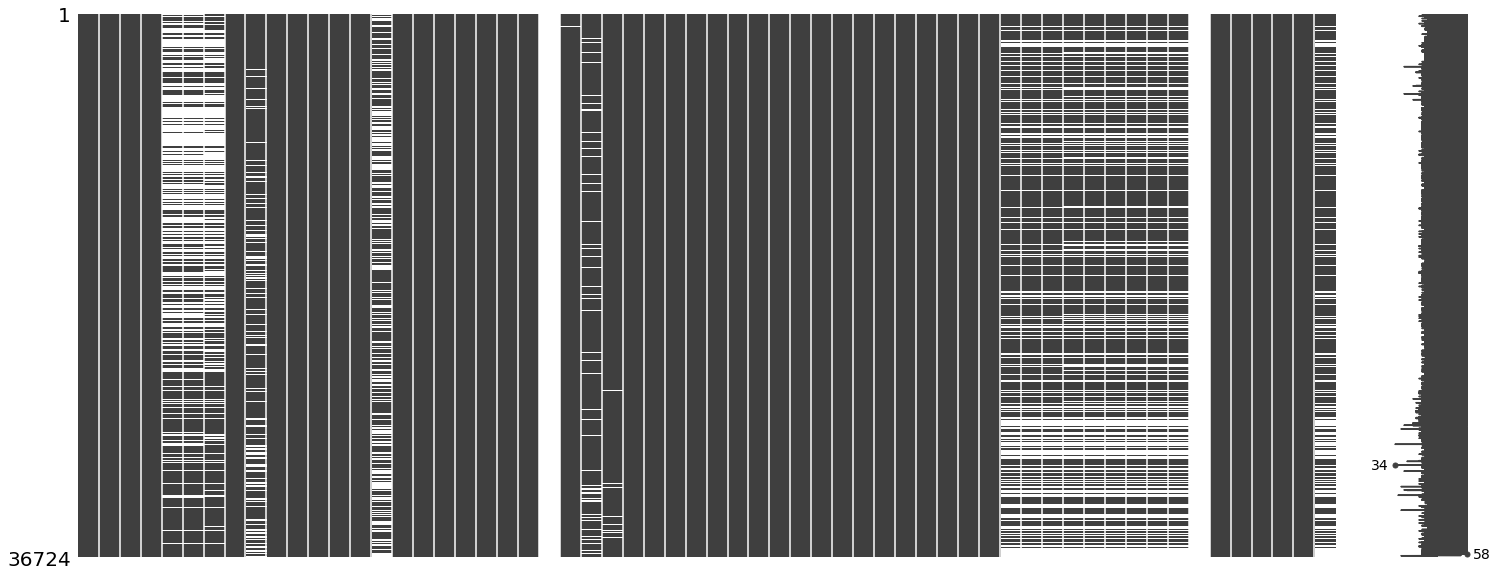

In [9]:
msno.matrix(listings_reduced)

In [10]:
listings_reduced.isna().sum()

id                                                  0
host_id                                             0
host_name                                          23
host_since                                         23
host_response_time                              15676
host_response_rate                              15676
host_acceptance_rate                            15186
host_is_superhost                                  23
host_neighbourhood                               6871
host_listings_count                                23
host_total_listings_count                          23
host_verifications                                  0
host_has_profile_pic                               23
host_identity_verified                             23
neighbourhood                                   14132
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

In [11]:
#drop bathrooms and licence, all values missing

listings_reduced.drop(['bathrooms', 'license'], axis=1, inplace=True)

/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
listings_reduced.shape

(36724, 58)

<AxesSubplot:>

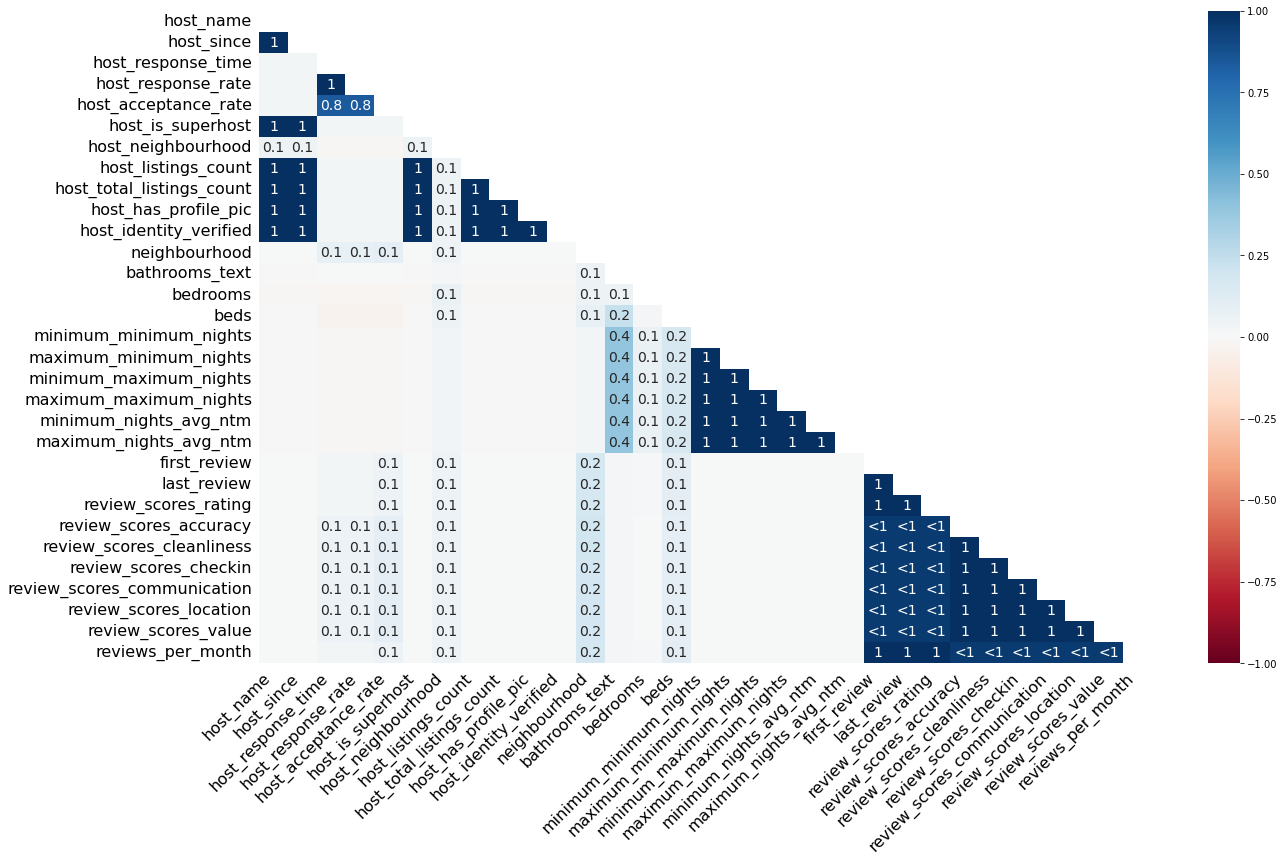

In [13]:
msno.heatmap(listings_reduced)

In [14]:
# Convert price from string to float
listings_reduced['price'] = listings_reduced['price'].replace('[\$,]', '', regex=True).astype(float)


/var/folders/vz/68jlc85d78vcqcr5gx1r56l40000gn/T/ipykernel_48422/882281266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_reduced['price'] = listings_reduced['price'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#listings_reduced.loc[listings_reduced['bathrooms_text'].str.contains('shared'), 'bathroom_type'] = 'shared'

In [ ]:
# Add bathroom type column

# create a new column and use np.select to assign values to it using our lists as arguments
#listings_reduced['bathrooms_type'] = pd.np.where(listings_reduced.bathrooms_text.str.contains('shared'), 'shared',
#                                     pd.np.where(listings_reduced.bathrooms_text.str.contains('private'), 'private'))
#listings_reduced['bathrooms_type'].head()

In [ ]:
# Convert bedrooms to number
#listings_reduced['bathrooms'] = listings_reduced['bathrooms_text'].str.extract("(\d*\.?\d+)", expand=True)
#listings_reduced['bathrooms'].head()

In [ ]:
#listings_reduced['bathrooms_type'].unique()

In [15]:
listings_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36724.0,2.732247e+07,1.636301e+07,2595.00000,1.235735e+07,2.795480e+07,4.294918e+07,5.145137e+07
host_id,36724.0,1.054899e+08,1.220695e+08,2420.00000,1.042882e+07,4.555160e+07,1.749868e+08,4.162927e+08
host_listings_count,36701.0,2.942497e+01,1.814686e+02,0.00000,1.000000e+00,1.000000e+00,3.000000e+00,3.966000e+03
host_total_listings_count,36701.0,2.942497e+01,1.814686e+02,0.00000,1.000000e+00,1.000000e+00,3.000000e+00,3.966000e+03
latitude,36724.0,4.072935e+01,5.556201e-02,40.50863,4.068953e+01,4.072553e+01,4.076275e+01,4.091139e+01
longitude,36724.0,-7.394958e+01,4.961128e-02,-74.24135,-7.398317e+01,-7.395499e+01,-7.393133e+01,-7.370522e+01
accommodates,36724.0,2.800920e+00,1.869686e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,32855.0,1.329569e+00,7.260601e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01
beds,36130.0,1.533518e+00,1.133531e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.200000e+01
price,36724.0,1.601091e+02,2.938884e+02,0.00000,6.700000e+01,1.080000e+02,1.750000e+02,1.000000e+04


In [18]:
# Simple Statistic
# price
# accommodates
# bedrooms
# baths
# number of reviews
# review_scores_rating


In [16]:
# Count numbers of rows with price = $0 and >$10k
listings_reduced[listings_reduced.price == 0].count()['price']  # 38 rows with $0
listings_reduced[listings_reduced.price >= 10000].count()['price']  # 7 rows with >$10k

# Replace price = $0 and >$10,000 with NaN
#listings_reduced['price'] = listings_reduced['price'].replace(0, np.nan)

#print('Current price with $0 is', listings_reduced[listings_reduced.price == 0].count()['price'])

38

7

(array([1.6547e+04, 1.2811e+04, 4.0700e+03, 1.4890e+03, 6.1500e+02,
        3.3500e+02, 1.9000e+02, 1.2200e+02, 1.1600e+02, 1.0100e+02,
        6.9000e+01, 3.2000e+01, 3.9000e+01, 1.5000e+01, 1.8000e+01,
        3.3000e+01, 8.0000e+00, 1.0000e+01, 7.0000e+00, 7.0000e+00,
        1.3000e+01, 3.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        1.1000e+01, 5.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00,
        6.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

Text(0.95, 0.49, 'count   \nmean    \nstd     \nmin     \n25%     \n50%     \n75%     \nmax     \nName:   \ndtype:  \n')

Text(1.05, 0.49, '36724.000000\n160.109057\n293.888431\n0.000000\n67.000000\n108.000000\n175.000000\n10000.000000\n  price,\n float64\n')

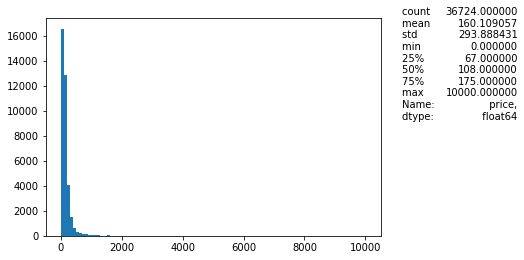

In [17]:
# Price - Histogram & Statistics Summary
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

plt.hist(listings_reduced['price'], bins=100)
plt.figtext(.95, .49, describe_helper(pd.Series(listings_reduced['price']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings_reduced['price']))[1], {'multialignment':'right'})
plt.show()


(array([ 6268., 20384.,  5559.,  3194.,   313.,   563.,   193.,    89.,
           42.,   119.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

Text(0.95, 0.49, 'count   \nmean    \nstd     \nmin     \n25%     \n50%     \n75%     \nmax     \nName:   \ndtype:  \n')

Text(1.05, 0.49, '36724.000000\n2.800920\n1.869686\n0.000000\n2.000000\n2.000000\n4.000000\n16.000000\naccommodates,\n float64\n')

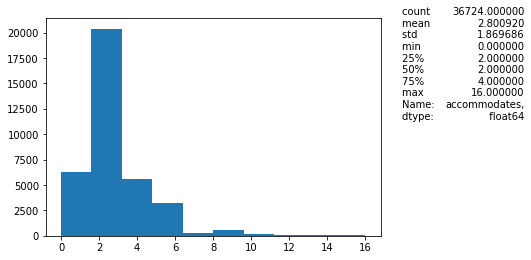

In [20]:
# Accommodates - Histogram & Statistics Summary

plt.hist(listings_reduced['accommodates'])
plt.figtext(.95, .49, describe_helper(pd.Series(listings_reduced['accommodates']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings_reduced['accommodates']))[1], {'multialignment':'right'})
plt.show()

(array([1.4950e+03, 2.2307e+04, 7.6180e+03, 2.7420e+03, 1.1880e+03,
        3.8100e+02, 1.9100e+02, 8.0000e+01, 5.5000e+01, 3.0000e+01,
        1.3000e+01, 8.0000e+00, 9.0000e+00, 3.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42.]),
 <BarContainer object of 42 artists>)

Text(0.95, 0.49, 'count   \nmean    \nstd     \nmin     \n25%     \n50%     \n75%     \nmax     \nName:   \ndtype:  \n')

Text(1.05, 0.49, '36130.000000\n1.533518\n1.133531\n0.000000\n1.000000\n1.000000\n2.000000\n42.000000\n   beds,\n float64\n')

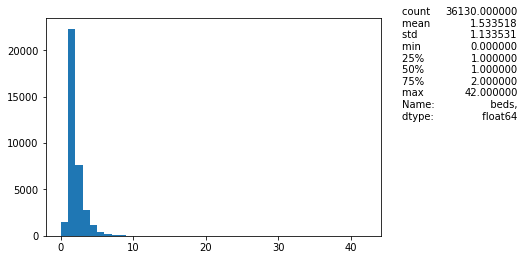

In [25]:
# Beds - Histogram & Statistics Summary

plt.hist(listings_reduced['beds'], bins=42)
plt.figtext(.95, .49, describe_helper(pd.Series(listings_reduced['beds']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings_reduced['beds']))[1], {'multialignment':'right'})
plt.show()

(array([2.7552e+04, 3.1760e+03, 1.7320e+03, 1.1340e+03, 7.4500e+02,
        5.6300e+02, 4.0800e+02, 3.3400e+02, 2.4000e+02, 1.9500e+02,
        1.4700e+02, 1.2500e+02, 9.5000e+01, 7.4000e+01, 4.2000e+01,
        3.9000e+01, 2.5000e+01, 1.8000e+01, 1.4000e+01, 1.4000e+01,
        1.0000e+01, 7.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00,
        6.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,  19.96,  39.92,  59.88,  79.84,  99.8 , 119.76, 139.72,
        159.68, 179.64, 199.6 , 219.56, 239.52, 259.48, 279.44, 299.4 ,
        319.36, 339.32, 359.28, 379.24, 399.2 , 419.16, 439.12, 459.08,
        479.04, 499.  , 518.96, 538.92, 558.88, 578.84, 598.8 , 618.76,
        638.72, 658.68, 678.64

Text(0.95, 0.49, 'count   \nmean    \nstd     \nmin     \n25%     \n50%     \n75%     \nmax     \nName:   \ndtype:  \n')

Text(1.05, 0.49, '36724.000000\n22.854836\n49.188479\n0.000000\n0.000000\n4.000000\n19.000000\n998.000000\nnumber_of_reviews,\n float64\n')

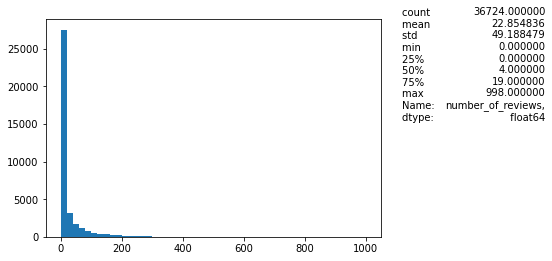

In [35]:
# Number of Reviews - Histogram & Statistics Summary

plt.hist(listings_reduced['number_of_reviews'], bins=50)
plt.figtext(.95, .49, describe_helper(pd.Series(listings_reduced['number_of_reviews']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings_reduced['number_of_reviews']))[1], {'multialignment':'right'})
plt.show()

In [ ]:
sns.set_theme(style='whitegrid')
sns.violinplot(x='neighbourhood_group_cleansed', y='price', data=listings_reduced)

In [ ]:
sns.violinplot(x='neighbourhood_group_cleansed', y='price', data=listings_reduced)
plt.ylim(-200,600)

In [ ]:
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=listings_reduced)
plt.ylim(-10,500)

In [ ]:
plt.scatter(x=listings_reduced.review_scores_rating, y=listings_reduced.price, marker='o', color='black')

In [ ]:
listings_reduced[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed').describe()

In [ ]:
listings_reduced['price'].describe()